### KNeighborsClassifier

In [53]:
import pandas as pd
import numpy as np
import joblib
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler

In [55]:
df=pd.read_csv("CatsAndDogs_v2.csv")
df

,Height,Weight,Length,FurLength,PawSize,EarShape,Animal
0,25,4,30,0,0,0,0
1,32,6,38,1,1,2,0
2,38,8,45,2,2,1,1
3,28,5,35,0,0,0,0
4,35,7,42,1,1,2,1
5,30,6,36,0,0,0,0
6,31,5,37,0,0,0,0
7,34,7,41,1,1,2,1
8,29,4,35,0,0,0,0
9,32,6,38,1,1,1,2


In [57]:
x=df[["Height","Weight","Length","FurLength","PawSize","EarShape"]]
x

,Height,Weight,Length,FurLength,PawSize,EarShape
0,25,4,30,0,0,0
1,32,6,38,1,1,2
2,38,8,45,2,2,1
3,28,5,35,0,0,0
4,35,7,42,1,1,2
5,30,6,36,0,0,0
6,31,5,37,0,0,0
7,34,7,41,1,1,2
8,29,4,35,0,0,0
9,32,6,38,1,1,1


In [59]:
y=df[["Animal"]]
y

,Animal
0,0
1,0
2,1
3,0
4,1
5,0
6,0
7,1
8,0
9,2


In [61]:
ss=StandardScaler()
ss.fit_transform(x)

array([[-1.16661981, -0.8450867 , -0.86019303, -1.31914047, -1.31914047,
        -1.35338771],
       [-0.30792755, -0.53138027, -0.38924936,  0.0860309 ,  0.0860309 ,
         1.10276036],
       [ 0.42809439, -0.21767385,  0.02282635,  1.49120227,  1.49120227,
        -0.12531368],
       [-0.79860884, -0.68823349, -0.56585324, -1.31914047, -1.31914047,
        -1.35338771],
       [ 0.06008342, -0.37452706, -0.15377752,  0.0860309 ,  0.0860309 ,
         1.10276036],
       [-0.55326819, -0.53138027, -0.50698528, -1.31914047, -1.31914047,
        -1.35338771],
       [-0.43059787, -0.68823349, -0.44811732, -1.31914047, -1.31914047,
        -1.35338771],
       [-0.0625869 , -0.37452706, -0.21264548,  0.0860309 ,  0.0860309 ,
         1.10276036],
       [-0.67593852, -0.8450867 , -0.56585324, -1.31914047, -1.31914047,
        -1.35338771],
       [-0.30792755, -0.53138027, -0.38924936,  0.0860309 ,  0.0860309 ,
        -0.12531368],
       [ 0.18275375, -0.21767385, -0.09490957,  1.

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train,x_test,y_train,y_test)

    Height  Weight  Length  FurLength  PawSize  EarShape
6       31       5      37          0        0         0
40      60      30     100          2        2         1
41      55      25      90          2        2         1
46      38      12      55          1        1         1
15      30       5      36          0        0         0
9       32       6      38          1        1         1
16      28       4      34          0        0         0
24      26       4      32          0        0         0
33      35      10      42          1        1         2
30      31      10      37          1        1         2
0       25       4      30          0        0         0
43      65      35     110          2        2         1
32      40      15      50          2        2         1
5       30       6      36          0        0         0
29      28       9      35          1        1         2
11      27       5      33          0        0         0
36      28       8      35     

In [65]:
k=4
knn= KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [67]:
joblib.dump(knn,'cat_model.pkl')

['cat_model.pkl']

In [69]:
pickle_filename='dog_model.pkl'
with open(pickle_filename,'wb')as file:
     pickle.dump(knn, file)

In [71]:
print("Model save to",pickle_filename)

Model save to dog_model.pkl


In [73]:
y_pred=knn.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [75]:
y_test

,Animal
13,0
45,1
47,0
44,1
17,0
27,0
26,1
25,0
31,1
19,0


In [77]:
acc_score=accuracy_score(y_pred,y_test)
acc_score

0.7333333333333333

In [79]:
cns_matrix=confusion_matrix(y_test,y_pred)
cns_matrix

array([[6, 3],
       [1, 5]], dtype=int64)

In [81]:
pns_score=precision_score(y_pred,y_test)
pns_score

0.8333333333333334

In [31]:
new_data=np.array([[32,6,38,1,1,2]])
new= ss.transform(new_data)
predicted_prob = knn.predict(new)
print(f'Predicted Outcome: {predicted_prob[0]}')


Predicted Outcome: 0


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [89]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Recall: 0.83
F1-score: 0.71


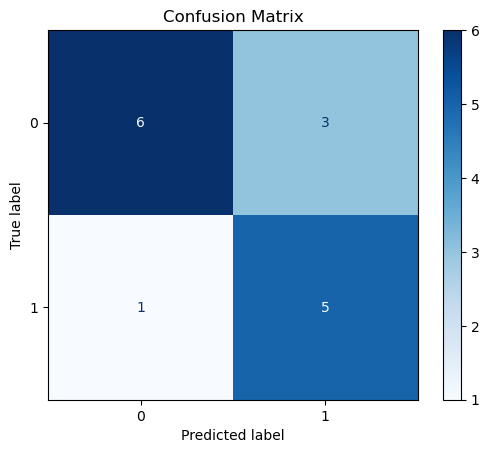

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix (already computed)
cns_matrix = confusion_matrix(y_test, y_pred)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cns_matrix)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


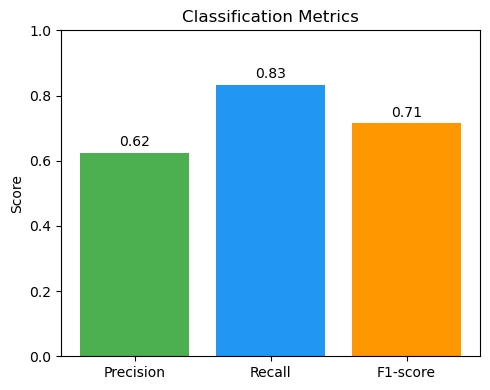

In [87]:
import matplotlib.pyplot as plt

# Assume precision, recall, and f1 are already computed
metrics = [precision, recall, f1]
metric_names = ["Precision", "Recall", "F1-score"]

plt.figure(figsize=(5,4))
bars = plt.bar(metric_names, metrics, color=["#4CAF50", "#2196F3", "#FF9800"])
plt.ylim(0,1)
plt.title("Classification Metrics")
plt.ylabel("Score")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2f}", ha="center")

plt.tight_layout()
plt.show()
